## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.api.types import  is_object_dtype, is_numeric_dtype
from scipy import stats
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)

## Installing External Libraries

In [197]:
!pip install missingno

In [198]:
!pip install imblearn

In [199]:
!pip install xgboost

In [200]:
!pip install xgboost
!pip install lightgbm
!pip install shap

In [201]:
import missingno as msno
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import ADASYN, SMOTE, KMeansSMOTE, SMOTENC

from sklearn.linear_model import LogisticRegressionCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import plot_importance
import shap

## Loading the Data

Note: For running the code, please keep all the data in "data/" folder in the same directory where the notebook is present

In [3]:
data = pd.read_csv("data/train (1).csv")
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
data = data.rename(columns =lambda x: x.replace("_6", "_June").replace("_7", "_July").replace("_8", "_Aug"))
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_June,last_date_of_month_July,last_date_of_month_Aug,arpu_June,arpu_July,arpu_Aug,onnet_mou_June,onnet_mou_July,onnet_mou_Aug,offnet_mou_June,offnet_mou_July,offnet_mou_Aug,roam_ic_mou_June,roam_ic_mou_July,roam_ic_mou_Aug,roam_og_mou_June,roam_og_mou_July,roam_og_mou_Aug,loc_og_t2t_mou_June,loc_og_t2t_mou_July,loc_og_t2t_mou_Aug,loc_og_t2m_mou_June,loc_og_t2m_mou_July,loc_og_t2m_mou_Aug,loc_og_t2f_mou_June,loc_og_t2f_mou_July,loc_og_t2f_mou_Aug,loc_og_t2c_mou_June,loc_og_t2c_mou_July,loc_og_t2c_mou_Aug,loc_og_mou_June,loc_og_mou_July,loc_og_mou_Aug,std_og_t2t_mou_June,std_og_t2t_mou_July,std_og_t2t_mou_Aug,std_og_t2m_mou_June,std_og_t2m_mou_July,std_og_t2m_mou_Aug,std_og_t2f_mou_June,std_og_t2f_mou_July,std_og_t2f_mou_Aug,std_og_t2c_mou_June,std_og_t2c_mou_July,std_og_t2c_mou_Aug,std_og_mou_June,std_og_mou_July,std_og_mou_Aug,isd_og_mou_June,isd_og_mou_July,isd_og_mou_Aug,spl_og_mou_June,spl_og_mou_July,spl_og_mou_Aug,og_others_June,og_others_July,og_others_Aug,total_og_mou_June,total_og_mou_July,total_og_mou_Aug,loc_ic_t2t_mou_June,loc_ic_t2t_mou_July,loc_ic_t2t_mou_Aug,loc_ic_t2m_mou_June,loc_ic_t2m_mou_July,loc_ic_t2m_mou_Aug,loc_ic_t2f_mou_June,loc_ic_t2f_mou_July,loc_ic_t2f_mou_Aug,loc_ic_mou_June,loc_ic_mou_July,loc_ic_mou_Aug,std_ic_t2t_mou_June,std_ic_t2t_mou_July,std_ic_t2t_mou_Aug,std_ic_t2m_mou_June,std_ic_t2m_mou_July,std_ic_t2m_mou_Aug,std_ic_t2f_mou_June,std_ic_t2f_mou_July,std_ic_t2f_mou_Aug,std_ic_t2o_mou_June,std_ic_t2o_mou_July,std_ic_t2o_mou_Aug,std_ic_mou_June,std_ic_mou_July,std_ic_mou_Aug,total_ic_mou_June,total_ic_mou_July,total_ic_mou_Aug,spl_ic_mou_June,spl_ic_mou_July,spl_ic_mou_Aug,isd_ic_mou_June,isd_ic_mou_July,isd_ic_mou_Aug,ic_others_June,ic_others_July,ic_others_Aug,total_rech_num_June,total_rech_num_July,total_rech_num_Aug,total_rech_amt_June,total_rech_amt_July,total_rech_amt_Aug,max_rech_amt_June,max_rech_amt_July,max_rech_amt_Aug,date_of_last_rech_June,date_of_last_rech_July,date_of_last_rech_Aug,last_day_rch_amt_June,last_day_rch_amt_July,last_day_rch_amt_Aug,date_of_last_rech_data_June,date_of_last_rech_data_July,date_of_last_rech_data_Aug,total_rech_data_June,total_rech_data_July,total_rech_data_Aug,max_rech_data_June,max_rech_data_July,max_rech_data_Aug,count_rech_2g_June,count_rech_2g_July,count_rech_2g_Aug,count_rech_3g_June,count_rech_3g_July,count_rech_3g_Aug,av_rech_amt_data_June,av_rech_amt_data_July,av_rech_amt_data_Aug,vol_2g_mb_June,vol_2g_mb_July,vol_2g_mb_Aug,vol_3g_mb_June,vol_3g_mb_July,vol_3g_mb_Aug,arpu_3g_June,arpu_3g_July,arpu_3g_Aug,arpu_2g_June,arpu_2g_July,arpu_2g_Aug,night_pck_user_June,night_pck_user_July,night_pck_user_Aug,monthly_2g_June,monthly_2g_July,monthly_2g_Aug,sachet_2g_June,sachet_2g_July,sachet_2g_Aug,monthly_3g_June,monthly_3g_July,monthly_3g_Aug,sachet_3g_June,sachet_3g_July,sachet_3g_Aug,fb_user_June,fb_user_July,fb_user_Aug,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [5]:
print(f"Shape of the Data: {data.shape}")

Shape of the Data: (69999, 172)


In [6]:
data['loc_ic_t2o_mou'].value_counts()

0.0    69297
Name: loc_ic_t2o_mou, dtype: int64

In [7]:
data.info(verbose = 3, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    id                           69999 non-null  int64  
 1    circle_id                    69999 non-null  int64  
 2    loc_og_t2o_mou               69297 non-null  float64
 3    std_og_t2o_mou               69297 non-null  float64
 4    loc_ic_t2o_mou               69297 non-null  float64
 5    last_date_of_month_June      69999 non-null  object 
 6    last_date_of_month_July      69600 non-null  object 
 7    last_date_of_month_Aug       69266 non-null  object 
 8    arpu_June                    69999 non-null  float64
 9    arpu_July                    69999 non-null  float64
 10   arpu_Aug                     69999 non-null  float64
 11   onnet_mou_June               67231 non-null  float64
 12   onnet_mou_July               67312 non-null  float64
 13  

<ipython-input-7-4d6265da18a0>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose = 3, null_counts=True)


---

## Handling Missing Values

In [8]:
def get_na_percentage(data, columns = None):
    """Function for generating null value percentage count
    """
    if columns != None:
        data = data[columns]
    df_na = pd.DataFrame(np.round(data.isna().sum()/data.shape[0] * 100, 2)).reset_index()
    df_na.rename(columns = {'index': 'Columns', 0: 'Missing Value Percentage'}, inplace =True)
    df_na = df_na.sort_values(by = ['Missing Value Percentage'], ascending = False)
    df_na = df_na.reset_index(drop = True)
    df_na = df_na[df_na['Missing Value Percentage'] > 0]
    return df_na

In [9]:
df_na = pd.DataFrame(np.round(data.isna().sum()/data.shape[0] * 100, 2)).reset_index()
df_na.rename(columns = {'index': 'Columns', 0: 'Missing Value Percentage'}, inplace =True)
df_na = df_na.sort_values(by = ['Missing Value Percentage'], ascending = False)
df_na = df_na.reset_index(drop = True)
df_na.head(30)

,Columns,Missing Value Percentage
0,arpu_3g_June,74.90
1,count_rech_2g_June,74.90
2,night_pck_user_June,74.90
3,arpu_2g_June,74.90
4,date_of_last_rech_data_June,74.90
5,total_rech_data_June,74.90
6,av_rech_amt_data_June,74.90
7,max_rech_data_June,74.90
8,count_rech_3g_June,74.90
9,fb_user_June,74.90


In [10]:
df_na['percentage_na__bucket'] = np.where(df_na['Missing Value Percentage'] == 0, "0% Missing",
                                         np.where(df_na['Missing Value Percentage'] <= 5, "0-5% Missing",
                                                 np.where(df_na['Missing Value Percentage'] <= 10, "5-10% Missing",
                                                         np.where(df_na['Missing Value Percentage'] <= 20, "10-20% Missing",
                                                                 np.where(df_na['Missing Value Percentage'] <= 30, "20-30% Missing", ">30% missing")))))
df_na.groupby("percentage_na__bucket", as_index = False)['Missing Value Percentage'].count()

,percentage_na__bucket,Missing Value Percentage
0,0% Missing,47
1,0-5% Missing,66
2,5-10% Missing,29
3,>30% missing,30


---

## Visualising Null Values

We need to look for if the values are missing at random (no pattern) or missing not at random (certain pattern exists, like if "mou" column is missing for a user for a certain month, then the "recharge" column is also missing, meaning the user neither recharged nor used the phone during the month, which gives us an indication if the user is at high risk of churning or not!

- In the matrix plots, the columns are represented by the different feature names(from left to right)
- The rows represent each index of the dataframe
- If the column contains a missing value it is marked as white horizontal line
- If value is present, it contains grey line
- If the white bars are all over the place, that would indicate that the values are Missing at Random and we any random/statistical imputation strategy to fill the numbers
- If the white bars form a sequential line across multiple columns, that would indicate that the values are Missing not at Random and we have to use logical values to fill them.

#### Missing Values > 70% 

<AxesSubplot:>

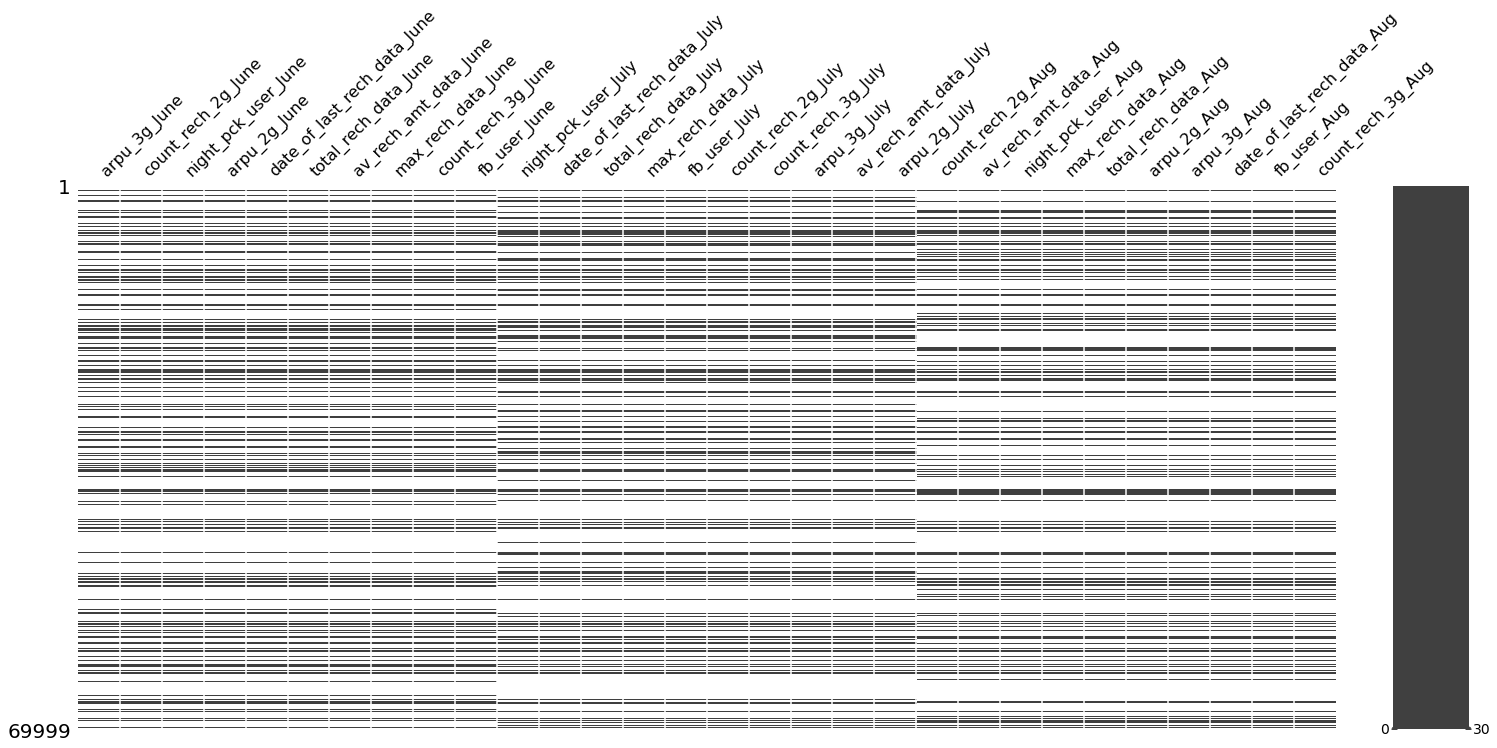

In [12]:
msno.matrix(data[df_na[df_na['Missing Value Percentage'] > 70]['Columns'].tolist()])

#### Missing values less than 5%

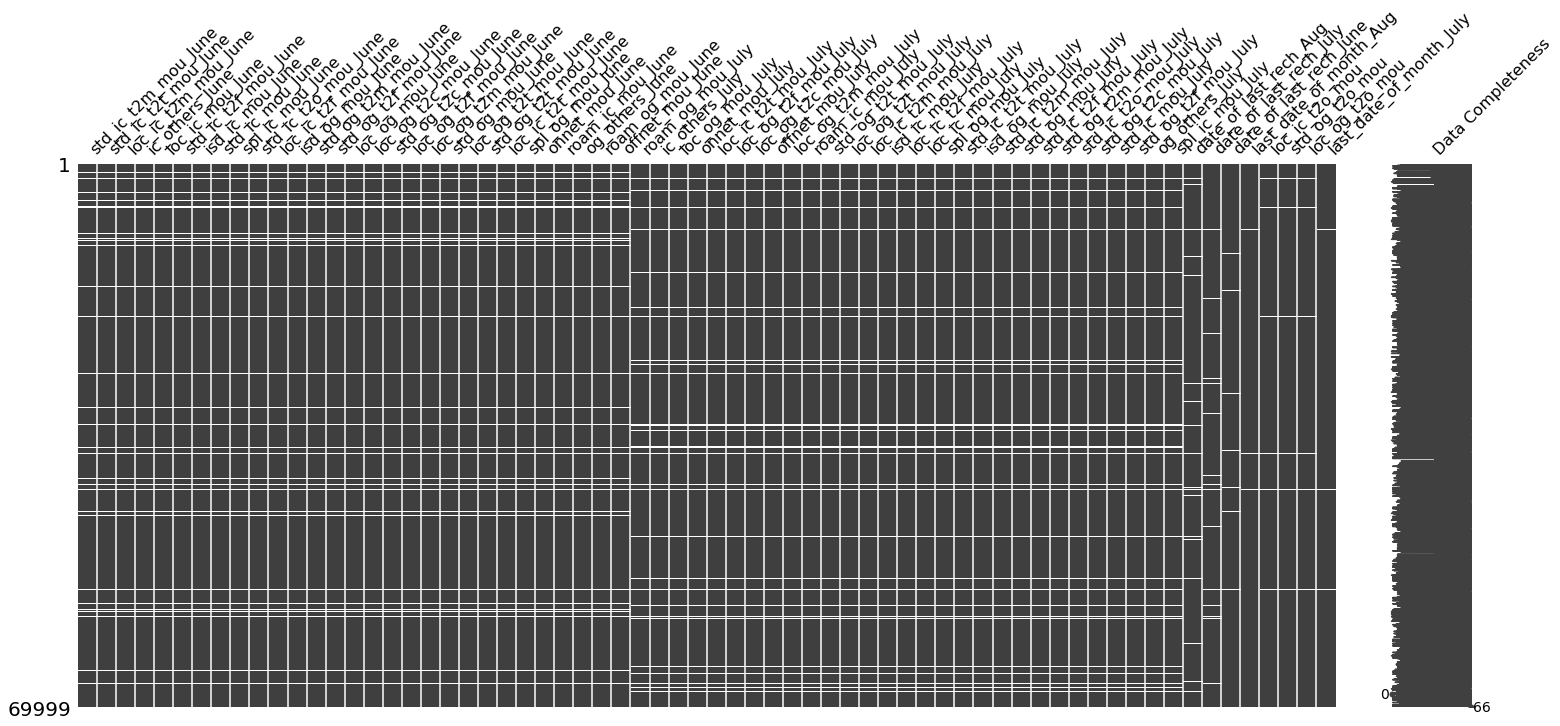

In [13]:
msno.matrix(data[df_na[(df_na['Missing Value Percentage'] >0 ) & (df_na['Missing Value Percentage'] <=5)]['Columns'].tolist()], labels = True)
plt.show()

#### Missing Values between 5-10%

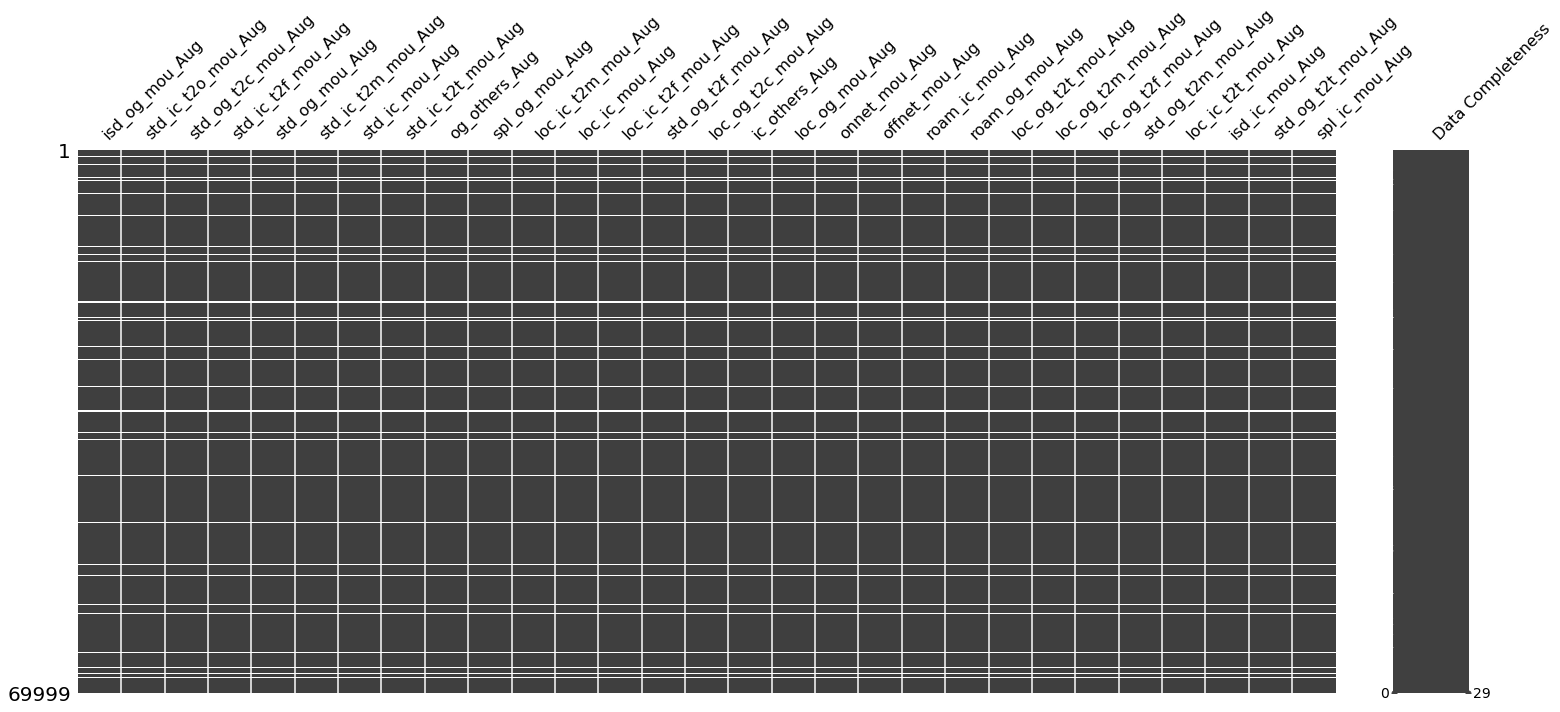

In [14]:
msno.matrix(data[df_na[(df_na['Missing Value Percentage'] >5) & (df_na['Missing Value Percentage'] <=10)]['Columns'].tolist()], labels = True)
plt.show()

---

## Analysing Missing Values in Minutes of Usage (MOU) related columns

In [15]:
mou_na_columns = [x for x in data.columns if "_mou_" in x]
get_na_percentage(data, mou_na_columns)

,Columns,Missing Value Percentage
0,isd_ic_mou_Aug,5.29
1,loc_og_t2m_mou_Aug,5.29
2,std_og_t2c_mou_Aug,5.29
3,isd_og_mou_Aug,5.29
4,std_og_t2f_mou_Aug,5.29
...,...,...
76,loc_ic_t2m_mou_July,3.84
77,std_og_t2t_mou_July,3.84
78,loc_ic_t2f_mou_July,3.84
79,loc_og_mou_July,3.84


In [16]:
data[data['loc_ic_mou_Aug'].isna()]['churn_probability'].value_counts()

1    2941
0     762
Name: churn_probability, dtype: int64

In [17]:
print(data[data['loc_ic_mou_July'].isna()]['churn_probability'].value_counts())
data[data['loc_ic_mou_June'].isna()]['churn_probability'].value_counts()

1    1481
0    1206
Name: churn_probability, dtype: int64


0    1856
1     912
Name: churn_probability, dtype: int64

In [18]:
data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

----

## Inference and Next Steps

- Majority of the columns have either no null values or within 0-10% missing values which can be addressed with logical/algorithmic feature imputation methods based on the nature of the feature.
- 30 columns have more than 30% missing values (as per the above dataframe, those 30 columns have more than 70% missing values, which need to be removed as even imputing these features will introduce unnecessary bias in the model
- The values are Missing Not At Random, there are long stretched of white horizontal lines in the matrix plots (refer to missing value for that particular index). Hence, we cannot use mean/median/Iterative Imputer to impute these values
    - For **Recharge** related columns, the presence of missing value suggests that the user didn't recharge for that particular month(s), and a logical way to impute is by filling the missing values with 0
    - **Out of tbe 7k instances of customer churning, around ~3k instances correspond to missing value in when the loc_ic_mou_Aug. So instead of filling the value with 0, we fill it with -1 to differentiate the observations**
    - For all other columns having 0-5% missing values, from the matrix plot, it is safe to assume that the values are Missing Not at Random, and that the presence of Missing value implies that the user did not use the particular service for that particular month, so instead of imputing with statistical measure (mean, median) or Iterative Imputer, we will impute the values with 0.

---
---

## Analysing Categorical/Binary Features



The following features are binary/categorical:

- Night Pack User
- FB User 


#### Steps:
- Analyse the null value percentage for the columns
- Analyse the variance in the columns (percentage of observations belonging to only one category)

In [19]:
categorical_cols = [x for x in data.columns if "night_pck_user" in x or "fb_user" in x]
categorical_cols

['night_pck_user_June',
 'night_pck_user_July',
 'night_pck_user_Aug',
 'fb_user_June',
 'fb_user_July',
 'fb_user_Aug']

In [20]:
data[categorical_cols].isna().sum()/data.shape[0] * 100

night_pck_user_June    74.902499
night_pck_user_July    74.478207
night_pck_user_Aug     73.689624
fb_user_June           74.902499
fb_user_July           74.478207
fb_user_Aug            73.689624
dtype: float64

In [21]:
for column in categorical_cols:
    print(column)
    print(data[column].fillna(-1).value_counts(normalize = True))


night_pck_user_June
-1.0    0.749025
 0.0    0.244632
 1.0    0.006343
Name: night_pck_user_June, dtype: float64
night_pck_user_July
-1.0    0.744782
 0.0    0.249075
 1.0    0.006143
Name: night_pck_user_July, dtype: float64
night_pck_user_Aug
-1.0    0.736896
 0.0    0.257575
 1.0    0.005529
Name: night_pck_user_Aug, dtype: float64
fb_user_June
-1.0    0.749025
 1.0    0.229975
 0.0    0.021000
Name: fb_user_June, dtype: float64
fb_user_July
-1.0    0.744782
 1.0    0.232132
 0.0    0.023086
Name: fb_user_July, dtype: float64
fb_user_Aug
-1.0    0.736896
 1.0    0.234246
 0.0    0.028858
Name: fb_user_Aug, dtype: float64


---

## Inference

- For the categorical columns, we can combine the three months of information into a single column as follows:
    - If the value for the month of august is Null:
        - if the values for June and July are also null:
            - assign new level '-1'  [the particular information not available for the user, or the user did not use the particular service at all]
        - if the value for June or July is not Null, but the value is Null for Aug:
            - assign a new level '2' [to segregate customers who have not been using the service at all vs. customer who stopped using the service]
    - If the value for august is not Null:
        - return the corresponding value for August [no change in levels]

---
---

## Analysing Date Related Columns

In [22]:
date_columns = [x for x in data.columns if "date" in x]
data[date_columns].head()

,last_date_of_month_June,last_date_of_month_July,last_date_of_month_Aug,date_of_last_rech_June,date_of_last_rech_July,date_of_last_rech_Aug,date_of_last_rech_data_June,date_of_last_rech_data_July,date_of_last_rech_data_Aug
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [23]:
get_na_percentage(data, date_columns)

,Columns,Missing Value Percentage
0,date_of_last_rech_data_June,74.90
1,date_of_last_rech_data_July,74.48
2,date_of_last_rech_data_Aug,73.69
3,date_of_last_rech_Aug,3.52
4,date_of_last_rech_July,1.76
5,date_of_last_rech_June,1.57
6,last_date_of_month_Aug,1.05
7,last_date_of_month_July,0.57


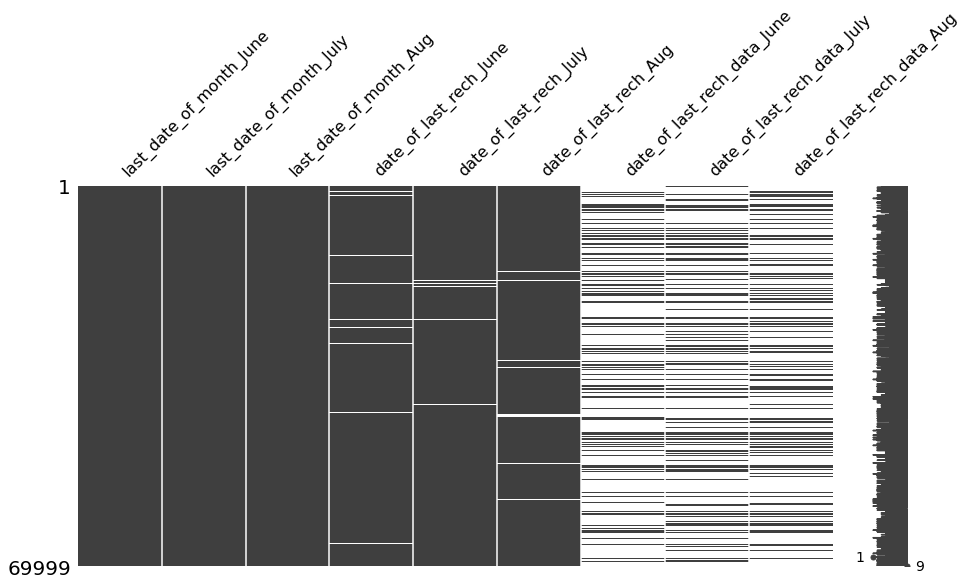

In [24]:
msno.matrix(data[date_columns], figsize = (15, 7))
plt.show()

---

## Inference

- The rech_data related date columns have more than 70% missing values and are unusable, so we'll drop these values
- "date_of_last_rech" related columns have values **Missing at Random**. Since the percentage of missing values is very small, we'll impute the values with the "Last Day of The Month"
    - We will further compute additional features such as duration between recharges from June to July and July to Aug, then we'll compute the difference between those features (this will tell if the duration increased between recharges or otherwise, the customer was planning to move to another service provider)
- The last_date_of_month column can be ignored for case study (after we fill the missing values in "date_of_last_rech"), as it doesn't contain any additional information.

---
---

# Create a Class For Data Preprocessing Based on The Above Analysis

In [25]:
class preprocessData:
    def __init__(self, data):
        self.data = data
    
    
    def create_aggregated_features(self,data, column_names = None, na_threshold = 50):
        """Function for automatically creating aggregated features for columns having more
        than a certain threshold of Null values [denoted by parameter na_threshold]
        Note: The columns must be present across the three months for aggregation

        :params:
        data : input dataframe

        column_names : the names of columns having more than a certain threshold of
        NULL values -> default = None
        If column names are not provided, it will compute from the data.

        na_threshold : If column_names are not provided, threshold of missing values
        to filter out columns for aggregation across three months
        """
        data = data.copy()
        if not column_names:
            column_names = (data.columns[data.isna().sum()/data.shape[0] * 100>na_threshold]).tolist()
        column_names = set(x.replace("_June", "").replace("_July", "").replace("_Aug", "") for x in column_names if "June" in x or "July" in x or "Aug" in x)
        for na_value_column in column_names:
            if na_value_column.startswith("av") or na_value_column.startswith("arpu"):
                data[f"{na_value_column}_last_3m"] = data[[x for x in data.columns if na_value_column in x]].mean(axis = 1, skipna = True)
            elif na_value_column.startswith("count"):
                data[f"{na_value_column}_last_3m"] = data[[x for x in data.columns if na_value_column in x]].sum(axis = 1, skipna = True)

            elif na_value_column.startswith("max"):
                data[f"{na_value_column}_last_3m"] = data[[x for x in data.columns if na_value_column in x]].max(axis = 1, skipna = True)

            elif na_value_column.startswith("total"):

                data[f"sum_{na_value_column}_last_3m"] = data[[x for x in data.columns if na_value_column in x]].sum(axis = 1, skipna = True)
                data[f"avg_{na_value_column}_last_3m"] = data[[x for x in data.columns if na_value_column in x]].mean(axis = 1, skipna = True)
        return data
    
    
    def categorical_feature_engineering(self, df, column):
        """Function for feature engineering categorical variables

        Logic:
        - If value in aug is null:
             - if value in june and july is also null:
                 return -1  [all null]
             - if either of june or july is not null but aug is null:
                 return 2 [new level assigned]
        - if value in aug is not null:
            return default value

        :params:
        > df: input dataframe
        > column : the categorical column to look for [ignoring the month name]
        """
        col1 = f"{column}_June"
        col2 = f"{column}_July"
        col3 = f"{column}_Aug"

        if pd.isna(df[col3]):
            if pd.isna(df[col1]) and pd.isna(df[col2]):
                return -1
            else:
                return 2
        elif df[col3] == 0:
            return 0
        elif df[col3] == 1:
            return 1
        
    
    def preprocess_dates(self, data):
        for month in ["June", "July", "Aug"]:
            data[f'last_date_of_month_{month}'] = data[f'last_date_of_month_{month}'].fillna(data[f'last_date_of_month_{month}'].mode())        
            data[f"date_of_last_rech_{month}"] = data[f"date_of_last_rech_{month}"].fillna(data[f'last_date_of_month_{month}'])
            data = data.drop(columns = [f'last_date_of_month_{month}'])
            data[f"date_of_last_rech_{month}"] = pd.to_datetime(data[f"date_of_last_rech_{month}"], format = "%m/%d/%Y")
        
        #creating average difference between recharges
        data['recharge_duration(June-July)'] = (data["date_of_last_rech_July"] - data['date_of_last_rech_June']).dt.days
        data['recharge_duration(July-Aug)'] = (data["date_of_last_rech_Aug"] - data['date_of_last_rech_July']).dt.days
        data['recharge_duration(June-July)'] = data['recharge_duration(June-July)'].fillna(-1)
        data['recharge_duration(July-Aug)'] = data['recharge_duration(July-Aug)'].fillna(-1)
        #drop all date columns
        data = data.drop(columns = [x for x in data.columns if "date" in x]) 
        return data
    
    
    def create_average_differences(self, data, categorical_cols, delete_aug_data = False):
        month_level_columns = set(x.replace("_June", "").replace("_July", "").replace("_Aug", "") for x in data.columns if "_June" in x or "_July" in x or "_Aug" in x)
        month_level_columns = [x for x in month_level_columns if "date" not in x]

        for column in month_level_columns:
            data[f"{column} average diff"] = data[f"{column}_Aug"] - ((data[f"{column}_June"] + data[f"{column}_July"])/2)
            if delete_aug_data:
                data = data.drop(columns = [f"{column}_Aug"])
        return data
    
    
    def clean_data(self):
        """Main Function for Preprocessing Input Data
        
        Steps:
        > Removes Initial Id related columns
        > For columns having high percentage of Missing values, it creates single column containing
        aggregated information (to reduce the percentage of missing values)
        > For the two categorical columns, creates new levels of categories based on missing data info
        > Drops all columns containing more than 40% missing values
        > For recharge columns, imputes with 0
        > For MOU columns, imputes with -1
        > For all other columns (very low percentage of NA values), based on matrix plot results,
        imputes with 0
        > Performs date-time manipulations
        > Engineers additional features:
            > Average change in august: value in august - average(value in June, value in July)
        > Removes features with 0 variance
        """
        
                
        #create aggregated features across 3 months
        data = self.create_aggregated_features(self.data)
        
        #remove initial columns [id, circle_id]
        data = data.drop(columns = ['id', 'circle_id'])
        
        #engineering new levels for categorical features containing null values
        data['night_pack_user_3m'] = data.apply(self.categorical_feature_engineering, axis = 1, column =  "night_pck_user")
        data['fb_user_3m'] = data.apply(self.categorical_feature_engineering, axis = 1, column =  "fb_user")
        #drop the initial categorical columns
        for col in ['night_pck_user', 'fb_user']:
            data = data.drop(columns = [f"{col}_June", f"{col}_July", f"{col}_Aug"])
        
        #drop columns containing more than 40% missing values
        columns_to_drop = (data.columns[data.isna().sum()/data.shape[0] * 100>40]).tolist()
        data = data.drop(columns = columns_to_drop)
        
        #for the remaining columns [recharge, mou etc.]
        #fill recharge related columns with 0
        #fill mou related columns with -1
        for column in [x for x in data.columns if "rech" in x and "date" not in x]:
            if data[column].isna().any():
                data[column] = data[column].fillna(0)
        
        for column in [x for x in data.columns if "mou" in x and "date" not in x]:
            if data[column].isna().any():
                data[column] = data[column].fillna(-1)
        
        #for all the other columns containing missing values, since the percentage is less
        #based on the above analysis, fill with 0
        for column in [x for x in data.columns if "others" in x]:
            if data[column].isna().any():
                data[column] = data[column].fillna(0)
        
        #date-time related imputation
        data = self.preprocess_dates(data)
        
        #create the difference of value in august and average value across june and july
        data = self.create_average_differences(data, categorical_cols = ['night_pack_user_3m', 'fb_user_3m'], delete_aug_data= False)
        
        #remove variables which have only single value (variance = 0)
        for column in data.columns:
            try:
                if data[column].var() == 0:
                    data = data.drop(columns = [column])
            except:
                continue
        return data

        


In [26]:
preprocess_obj = preprocessData(data)

data_filtered = preprocess_obj.clean_data()

In [27]:
data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_June,arpu_July,arpu_Aug,onnet_mou_June,onnet_mou_July,onnet_mou_Aug,offnet_mou_June,offnet_mou_July,offnet_mou_Aug,roam_ic_mou_June,roam_ic_mou_July,roam_ic_mou_Aug,roam_og_mou_June,roam_og_mou_July,roam_og_mou_Aug,loc_og_t2t_mou_June,loc_og_t2t_mou_July,loc_og_t2t_mou_Aug,loc_og_t2m_mou_June,loc_og_t2m_mou_July,loc_og_t2m_mou_Aug,loc_og_t2f_mou_June,loc_og_t2f_mou_July,loc_og_t2f_mou_Aug,loc_og_t2c_mou_June,loc_og_t2c_mou_July,loc_og_t2c_mou_Aug,loc_og_mou_June,loc_og_mou_July,loc_og_mou_Aug,std_og_t2t_mou_June,std_og_t2t_mou_July,std_og_t2t_mou_Aug,std_og_t2m_mou_June,std_og_t2m_mou_July,std_og_t2m_mou_Aug,std_og_t2f_mou_June,std_og_t2f_mou_July,std_og_t2f_mou_Aug,std_og_t2c_mou_June,std_og_t2c_mou_July,std_og_t2c_mou_Aug,std_og_mou_June,std_og_mou_July,std_og_mou_Aug,isd_og_mou_June,isd_og_mou_July,isd_og_mou_Aug,spl_og_mou_June,spl_og_mou_July,spl_og_mou_Aug,og_others_June,og_others_July,og_others_Aug,total_og_mou_June,total_og_mou_July,total_og_mou_Aug,loc_ic_t2t_mou_June,loc_ic_t2t_mou_July,loc_ic_t2t_mou_Aug,loc_ic_t2m_mou_June,loc_ic_t2m_mou_July,loc_ic_t2m_mou_Aug,loc_ic_t2f_mou_June,loc_ic_t2f_mou_July,loc_ic_t2f_mou_Aug,loc_ic_mou_June,loc_ic_mou_July,loc_ic_mou_Aug,std_ic_t2t_mou_June,std_ic_t2t_mou_July,std_ic_t2t_mou_Aug,std_ic_t2m_mou_June,std_ic_t2m_mou_July,std_ic_t2m_mou_Aug,std_ic_t2f_mou_June,std_ic_t2f_mou_July,std_ic_t2f_mou_Aug,std_ic_t2o_mou_June,std_ic_t2o_mou_July,std_ic_t2o_mou_Aug,std_ic_mou_June,std_ic_mou_July,std_ic_mou_Aug,total_ic_mou_June,total_ic_mou_July,total_ic_mou_Aug,spl_ic_mou_June,spl_ic_mou_July,spl_ic_mou_Aug,isd_ic_mou_June,isd_ic_mou_July,isd_ic_mou_Aug,ic_others_June,ic_others_July,ic_others_Aug,total_rech_num_June,total_rech_num_July,total_rech_num_Aug,total_rech_amt_June,total_rech_amt_July,total_rech_amt_Aug,max_rech_amt_June,max_rech_amt_July,max_rech_amt_Aug,last_day_rch_amt_June,last_day_rch_amt_July,last_day_rch_amt_Aug,vol_2g_mb_June,vol_2g_mb_July,vol_2g_mb_Aug,vol_3g_mb_June,vol_3g_mb_July,vol_3g_mb_Aug,monthly_2g_June,monthly_2g_July,monthly_2g_Aug,sachet_2g_June,sachet_2g_July,sachet_2g_Aug,monthly_3g_June,monthly_3g_July,monthly_3g_Aug,sachet_3g_June,sachet_3g_July,sachet_3g_Aug,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,count_rech_2g_last_3m,count_rech_3g_last_3m,sum_total_rech_data_last_3m,avg_total_rech_data_last_3m,night_pack_user_3m,fb_user_3m,recharge_duration(June-July),recharge_duration(July-Aug),isd_og_mou average diff,vol_2g_mb average diff,std_og_t2c_mou average diff,monthly_2g average diff,std_og_mou average diff,std_ic_t2m_mou average diff,roam_ic_mou average diff,onnet_mou average diff,std_ic_t2o_mou average diff,loc_og_t2t_mou average diff,loc_og_t2m_mou average diff,total_og_mou average diff,std_ic_t2t_mou average diff,monthly_3g average diff,ic_others average diff,max_rech_amt average diff,last_day_rch_amt average diff,total_rech_num average diff,roam_og_mou average diff,loc_og_t2f_mou average diff,arpu average diff,sachet_3g average diff,loc_og_t2c_mou average diff,std_og_t2m_mou average diff,loc_ic_t2t_mou average diff,std_og_t2f_mou average diff,std_ic_t2f_mou average diff,vol_3g_mb average diff,og_others average diff,total_rech_amt average diff,isd_ic_mou average diff,std_og_t2t_mou average diff,loc_og_mou average diff,sachet_2g average diff,std_ic_mou average diff,spl_og_mou average diff,loc_ic_t2m_mou average diff,spl_ic_mou average diff,total_ic_mou average diff,loc_ic_mou average diff,loc_ic_t2f_mou average diff,offnet_mou average diff
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.

In [28]:
get_na_percentage(data_filtered)

,Columns,Missing Value Percentage


In [29]:
data_filtered['night_pack_user_3m'].value_counts()/data.shape[0]

-1    0.626809
 0    0.257575
 2    0.110087
 1    0.005529
Name: night_pack_user_3m, dtype: float64

In [30]:
data_filtered['fb_user_3m'].value_counts()/data.shape[0]

-1    0.626809
 1    0.234246
 2    0.110087
 0    0.028858
Name: fb_user_3m, dtype: float64

In [31]:
data_filtered.shape

(69999, 184)

In [32]:
print("Checking for presence of infinite values in data")
print(f"{data_filtered.isin([np.inf, -np.inf]).any().sum()} records with infinite values")

Checking for presence of infinite values in data
0 records with infinite values


## EDA : Response Variable

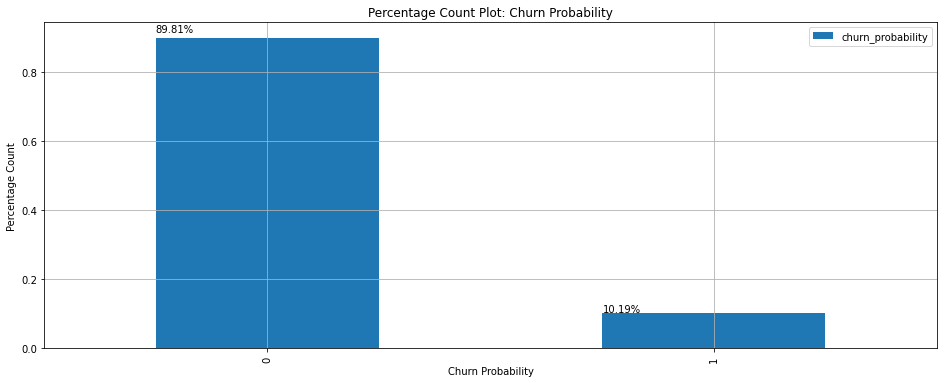

In [33]:
ax = pd.DataFrame(data_filtered['churn_probability'].value_counts(normalize = True)).plot(kind = 'bar',
                                                                            figsize = (16,6),
                                                                            title = 'Percentage Count Plot: Churn Probability',
                                                                            xlabel = 'Churn Probability',
                                                                            ylabel = 'Percentage Count',
                                                                            grid = True,
                                                                        )
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height()*100, 2))+"%", (p.get_x() * 1.001, p.get_height() * 1.02))

## Inference

- The response variable is highly skewed. It needs to be addressed with proper oversampling techniques.

---

## EDA : Predictors

#### 1. Visualising Recharge Related Columns

In [34]:
recharge_columns = [x for x in data_filtered.columns if "rech" in x and "date" not in x]
len(recharge_columns)

18

In [35]:
def plot_boxplots(df, nrows, ncols, columns_list, figsize = (30,30), yj_transform = False):
    """Function for plotting side by side bar plot for categorical columns
    and twin axis pointplot of Dependent variable
    
    :params:
    
    data: pandas DataFrame
    nrows: number of rows in the matplotlib subplot
    ncols: number of columns in the matplotlib subplot
    columns_list: List of categorical columns
    figsize: Matplotlib Subplot figure size
    
    nrows and ncols are dependent on the numer of columns present in the
    columns list
    """
    data = df.copy()
    fig, axs = plt.subplots(nrows, ncols, figsize = figsize, squeeze = False)
    i = 0
    j = 0
    for column in columns_list:
        try:
            if yj_transform:
                data[column] = stats.yeojohnson(data[column])[0]
            sns.boxplot(data = data, y = column, ax = axs[i,j], x = 'churn_probability', width = 0.7,fliersize = 2, whis = 1.5)
            sns.despine(offset=10, trim=False)
            axs[i,j].grid()
            axs[i,j].set_title(f"Boxplot: {column}")
            axs[i,j].set_xlabel(column)
            j += 1
            if j > ncols-1:
                i += 1
                j = 0
            if i >nrows-1 and j>ncols-1:
                break
        except Exception as e:
            print(e)
            continue
    plt.show()

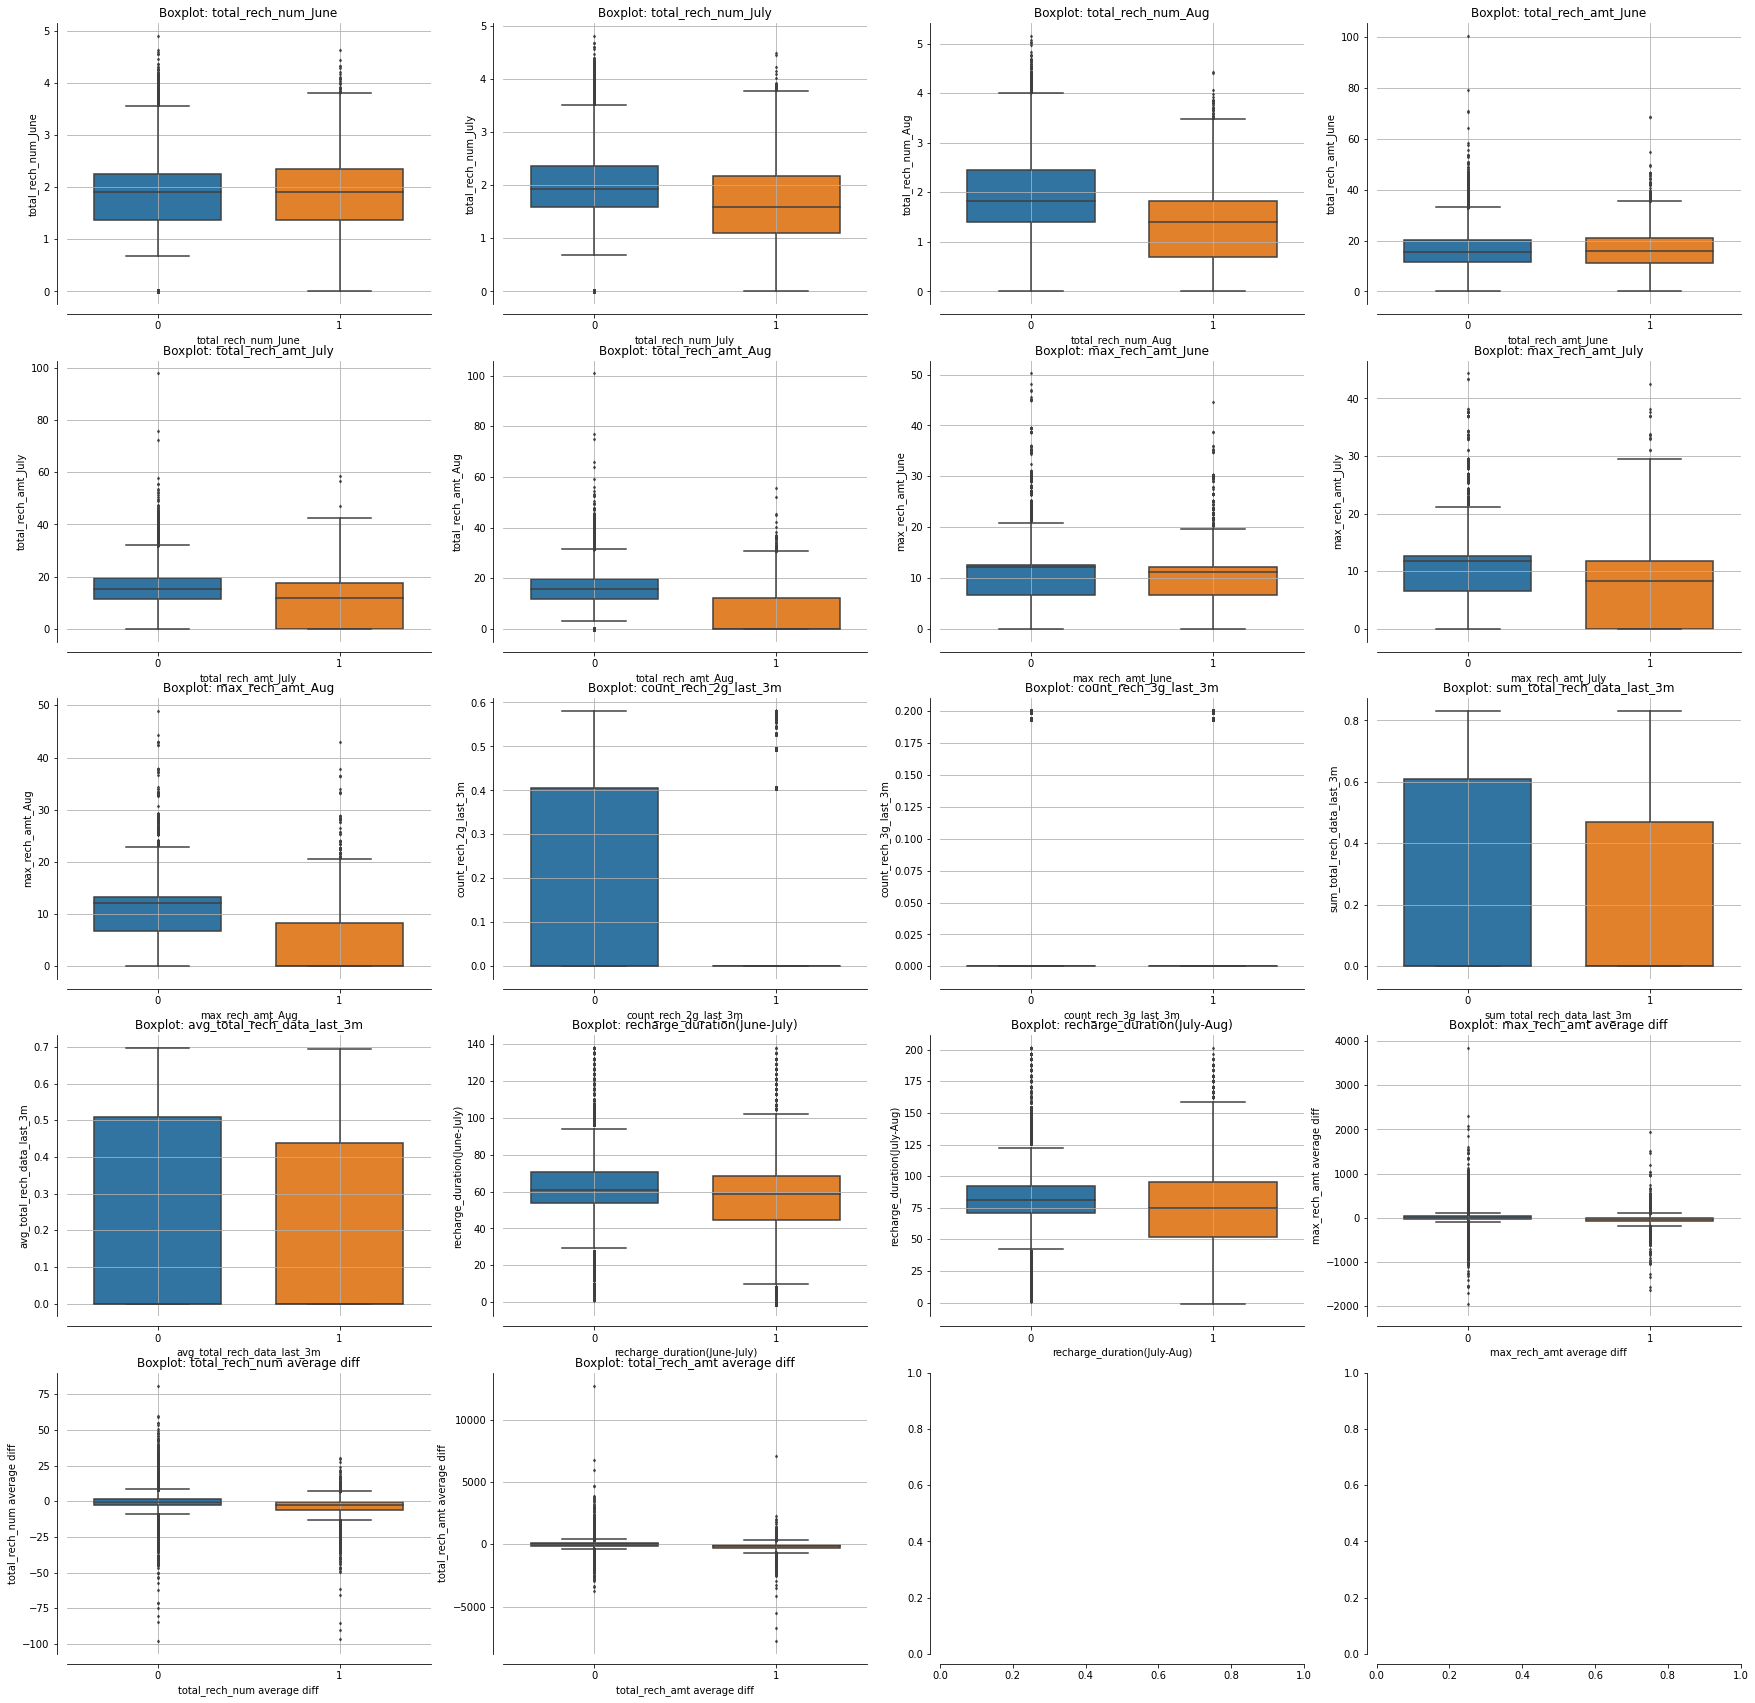

In [36]:
plot_boxplots(data_filtered, 5, 4, recharge_columns, figsize = (30,30), yj_transform = True)

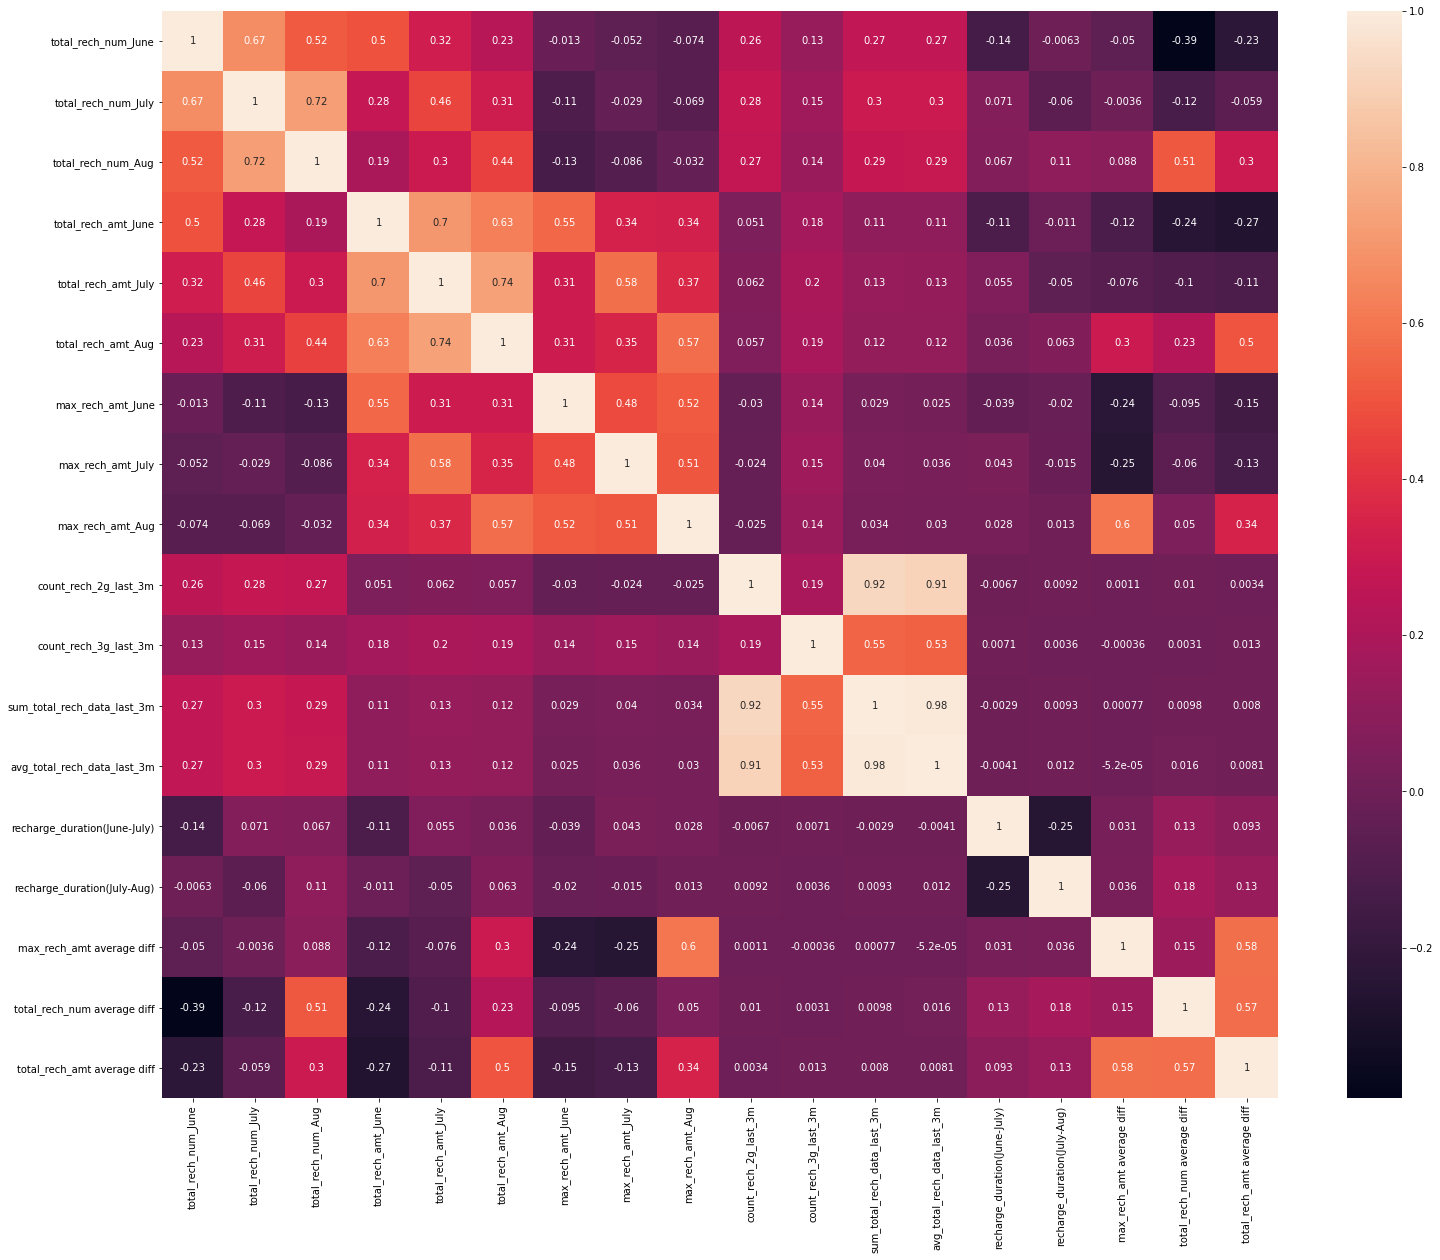

In [37]:
plt.figure(figsize = (25, 20))
sns.heatmap(data_filtered[recharge_columns].corr(),annot = True)
plt.show()

## Inference

- Some recharge related columns for the month of Aug e.g total_rech_num_Aug have a distribution more centred towards a lower median for churn_probability = 1 [Indicating that users who churn have a lower recharge instance in the last month, i.e Aug]
- Some features like (avg_total_rech_data_last_3m, count_rech_2g_last_3m) etc. have high multicollinearity. Multicollinearity will be handled while building the second model for explaining feature interractions

### 2. Visualising Minutes of Usage

In [38]:
mou_columns = [x for x in data_filtered.columns if "mou" in x and "date" not in x]
len(mou_columns)

119

We divide the columns month wise for ease of visualisation of all columns

In [39]:
mou_columns_june = [x for x in mou_columns if "June" in x]
mou_columns_july = [x for x in mou_columns if "July" in x]
mou_columns_aug = [x for x in mou_columns if "Aug" in x]
mou_columns_others = [x for x in mou_columns if x not in mou_columns_june \
                      and x not in mou_columns_july \
                      and x not in mou_columns_aug]

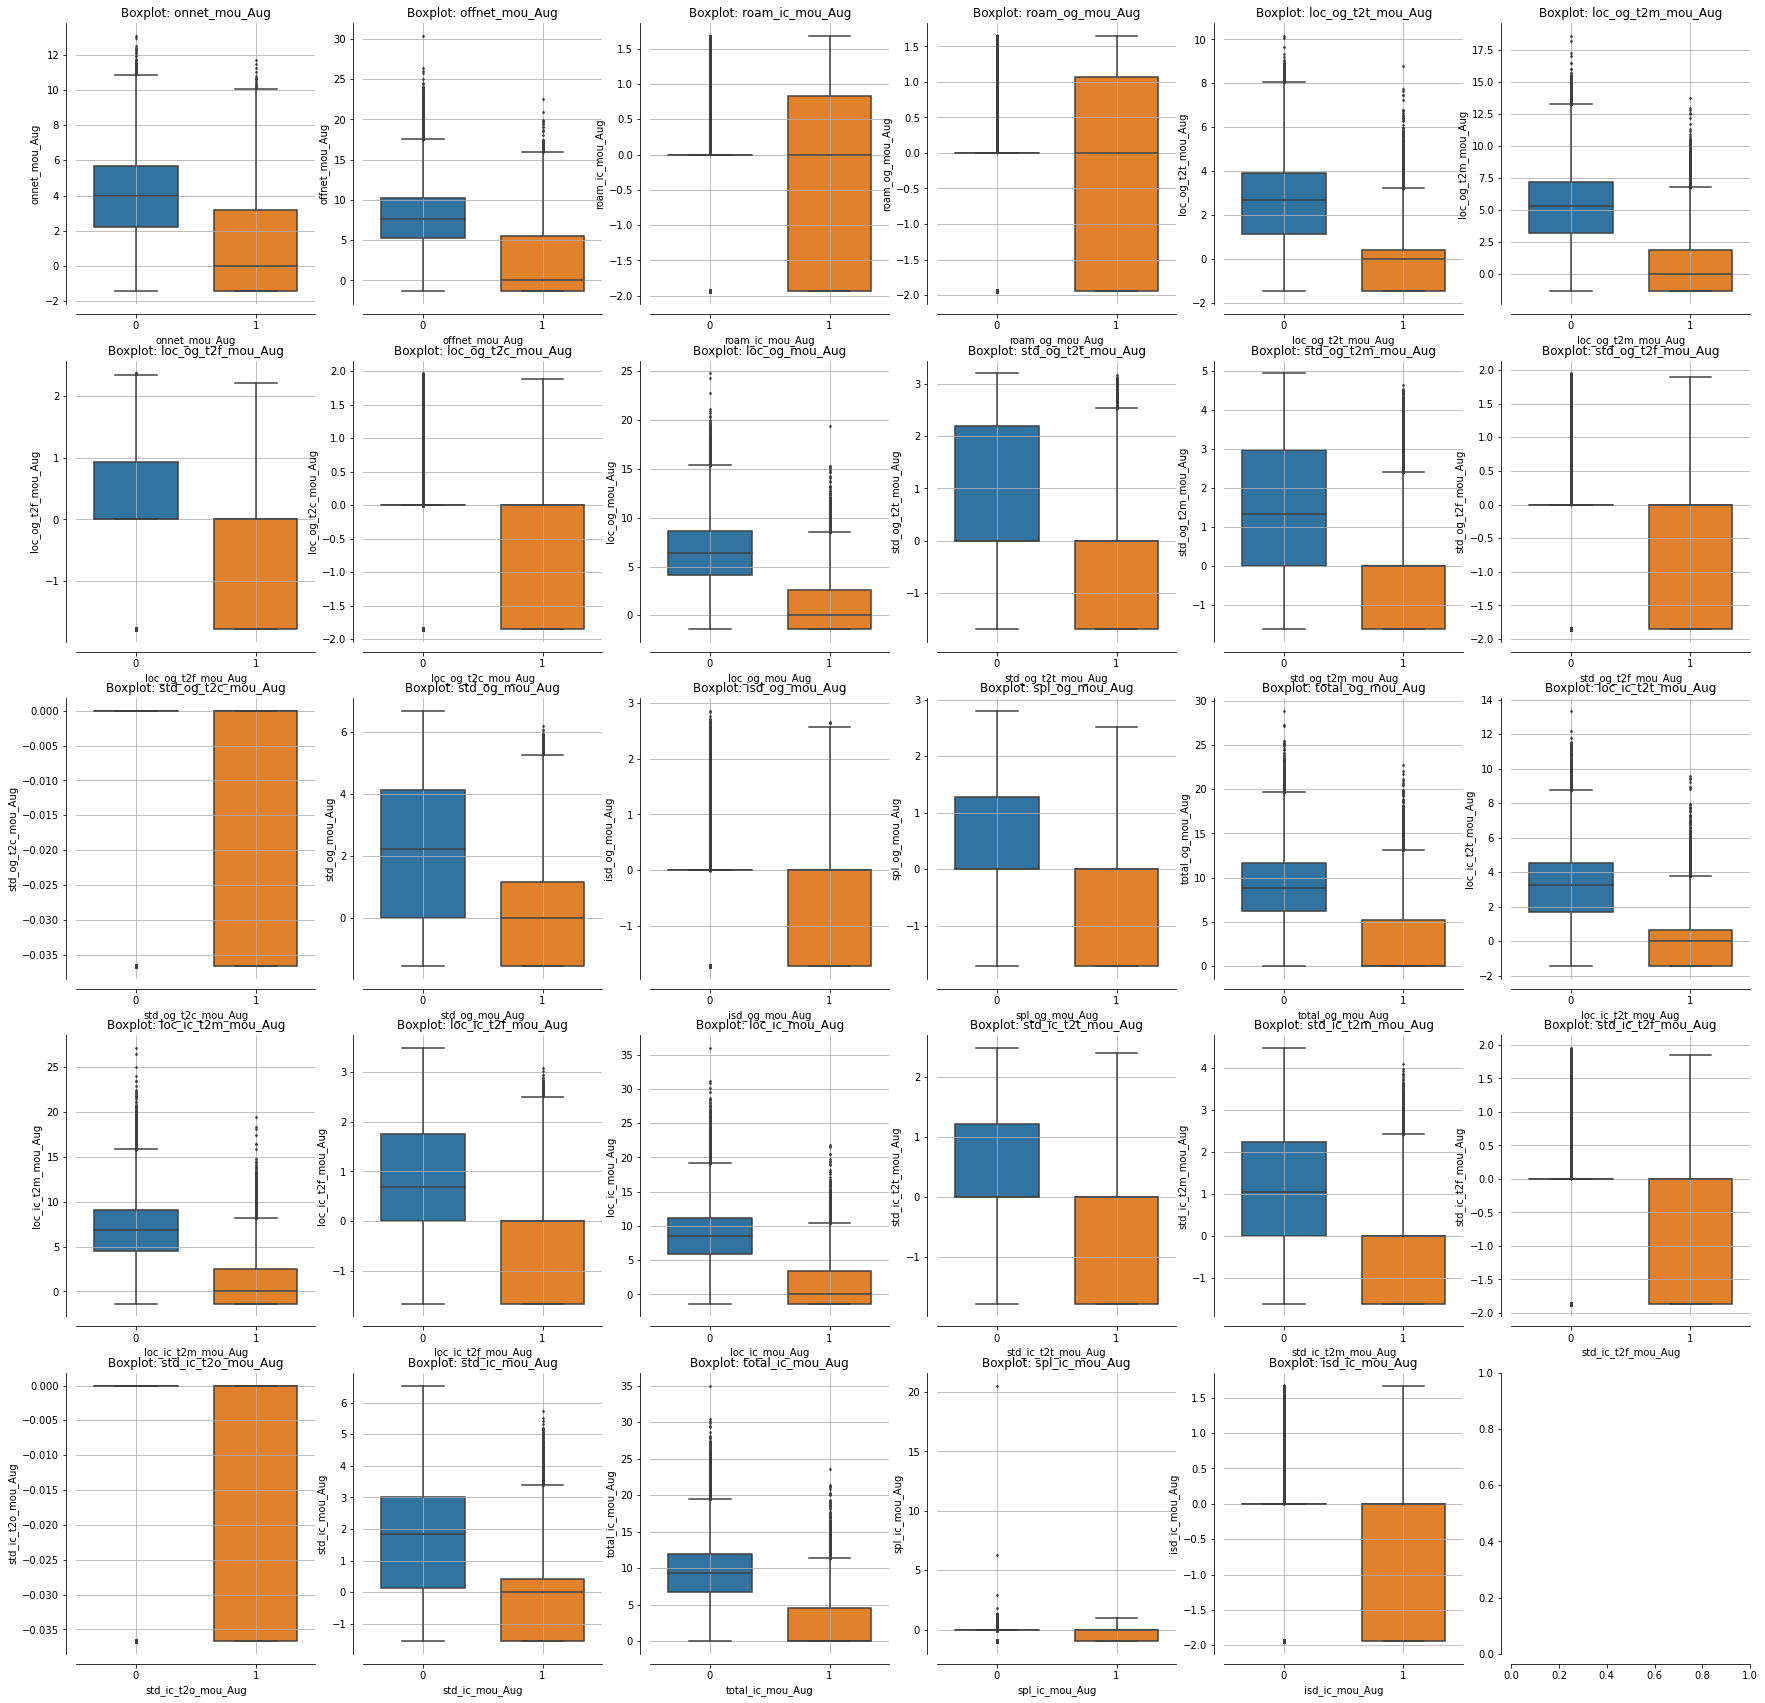

In [40]:
plot_boxplots(data_filtered, 5, 6, mou_columns_aug, figsize = (30,30), yj_transform = True)

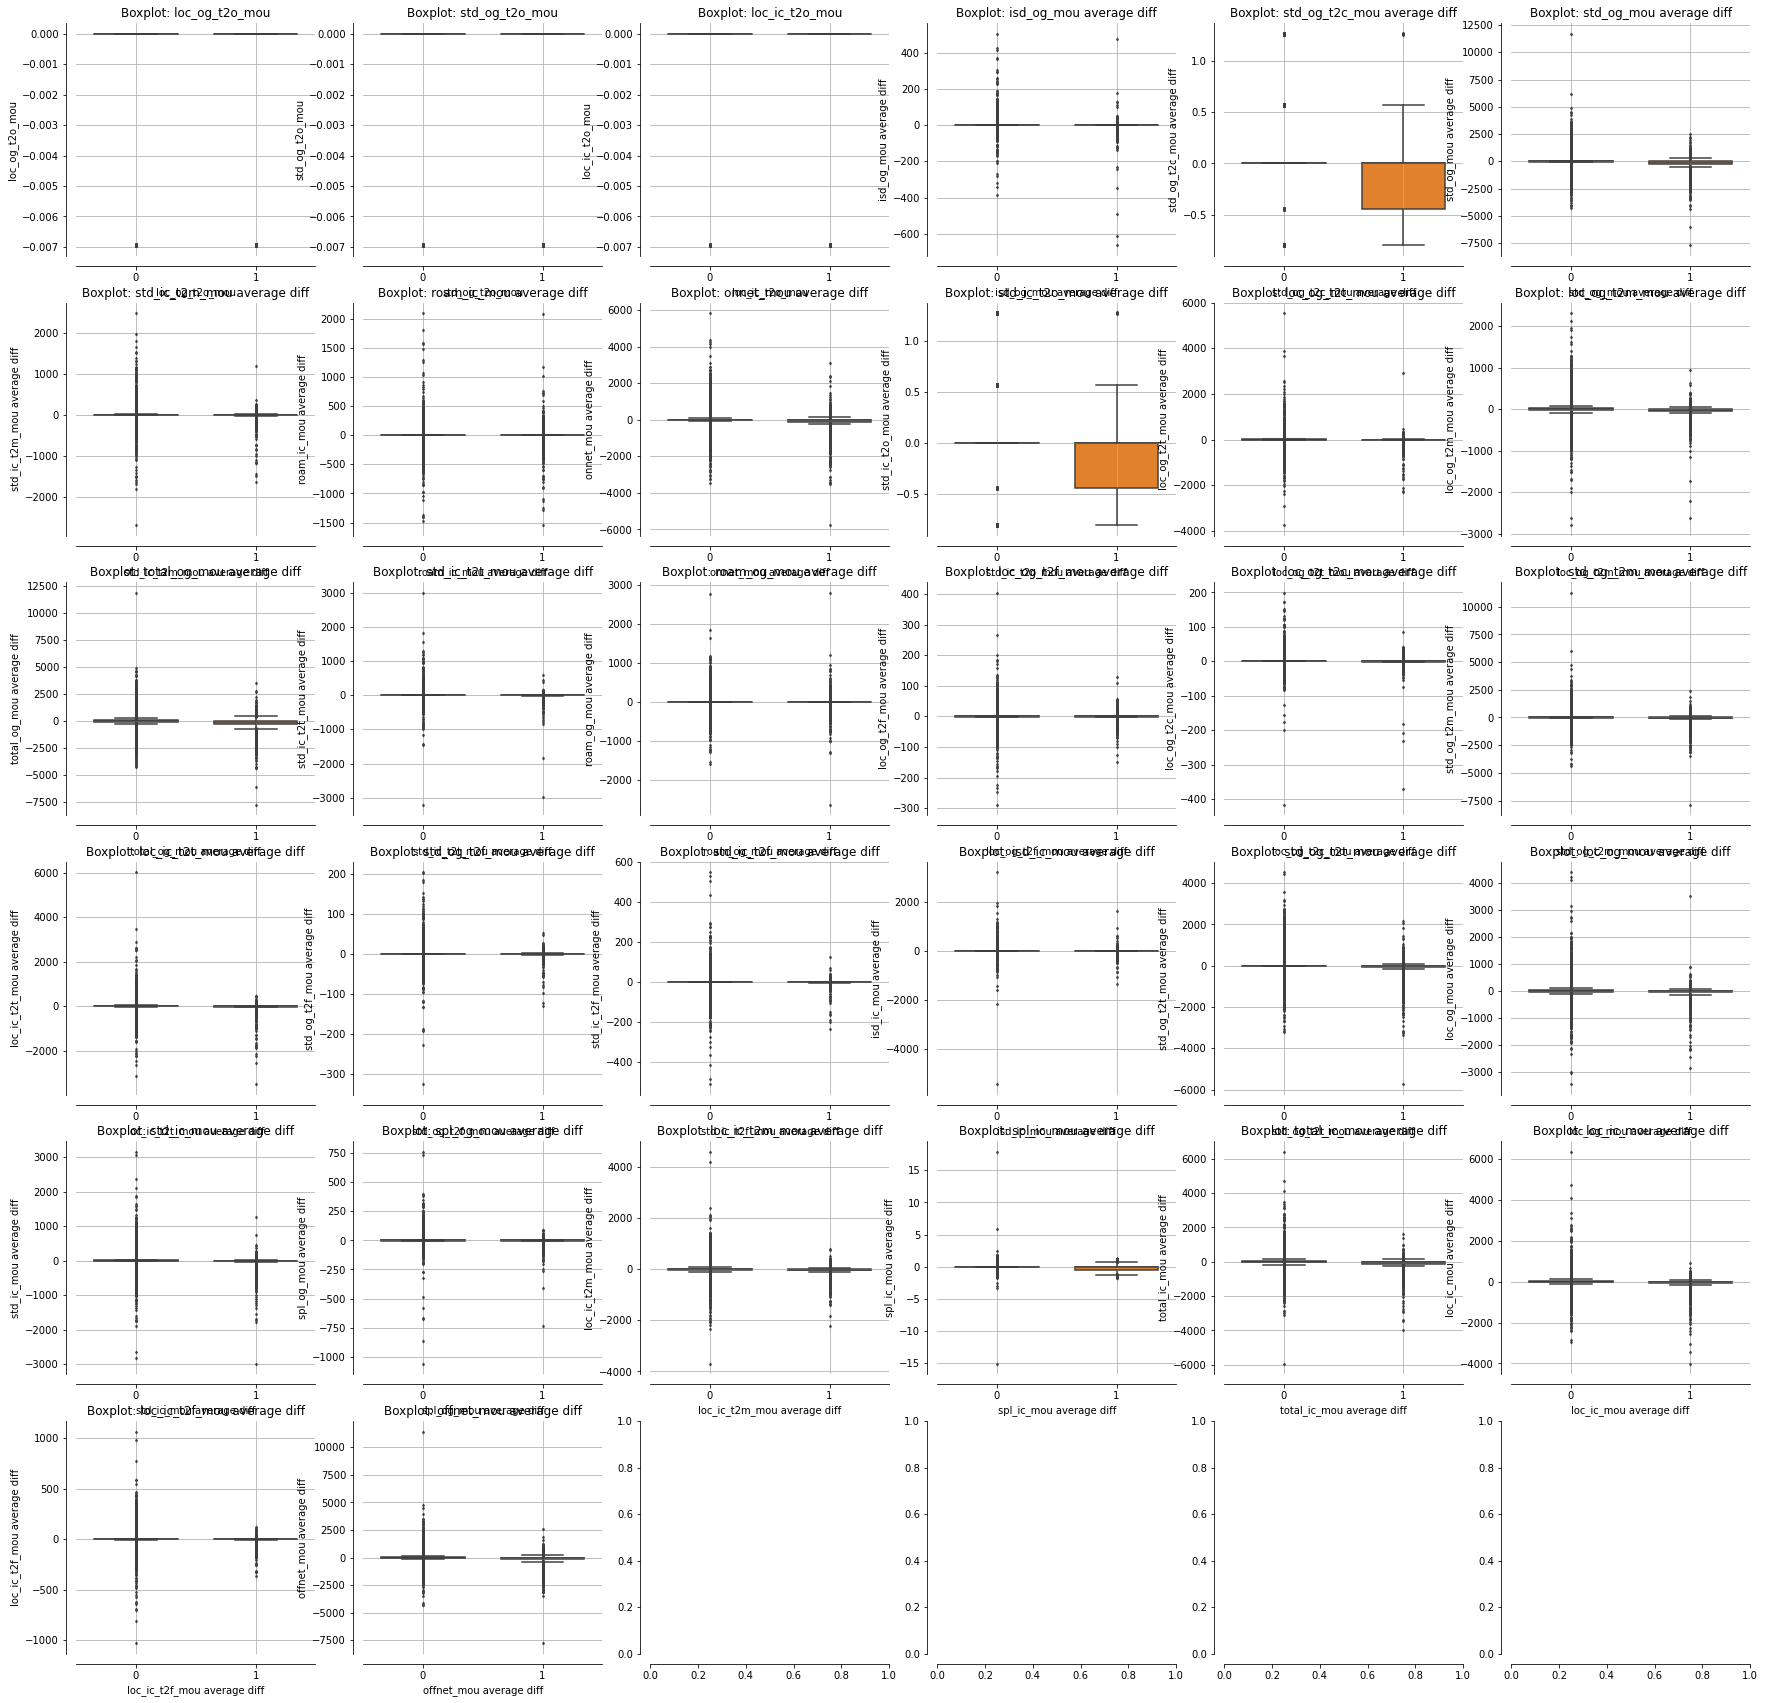

In [41]:
plot_boxplots(data_filtered, 6, 6, mou_columns_others, figsize = (30,30), yj_transform = True)

## Inference

- For Majority of the Minutes of Usage Related columns, the numbers drop in the month of August for users who churn

---
---

# Modelling

### Encoding Categorical Columns

In [45]:
data_filtered['night_pack_user_3m'] = data_filtered['night_pack_user_3m'].astype(str)
data_filtered['fb_user_3m'] = data_filtered['fb_user_3m'].astype(str)

data_filtered = pd.get_dummies(data_filtered, columns=['night_pack_user_3m', 'fb_user_3m'], drop_first=True)

### Oversampling using SMOTE

- Since around 90% of the observations refer to "no churn", and 10% refer to "churn", we use SMOTE for oversampling the minority class for creating a balanced dataset

In [46]:
X = data_filtered.drop(columns = ['churn_probability'])
y = data_filtered['churn_probability']

ada = SMOTE(random_state=42,)
X_res, y_res = ada.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42, stratify = y_res)

### Scaling

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality Reduction using PCA


In [203]:
#retain 99% of the variance in the data
pca = PCA(0.99, random_state = 10)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

X_train_new.shape

(69999, 39)

**The number of new features drops to 39, while still maintaining 99% of the variance in the data**

---

In [53]:

class RegressionModel(BaseEstimator, RegressorMixin):
    """
    Custom Regression Class inheritted from Sklearn Base Class for estimators
    ...
    
    :Attributes:
    ----------
    : estimator(None)
        Estimator for performing regression
        
    :Methods:
    ----------
    : fit(X, y = None)
        Fits the specified estimator to the data
    : predict(X, y = None)
        Predicts dependent variable on the data provided
    """
    def __init__(self, estimator = None):
        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)

In [54]:
def run_regression_pipeline(X_train, y_train, model_list, X_test = None, y_test = None):
    """Main Function for running the regression model
    
    :param: X_train : pd.DataFrame or np.array
    :param: y_train : pd.DataFrame or np.array
    :param: X_test : pd.DataFrame or np.array
    :param: y_test : pd.DataFrame or np.array
    :param: model_list : list of models to run
    
    :returns:
    results_df: final dataframe containing the output metrics
    of all the model runs for models defined in model_list
    """
    results_df = pd.DataFrame()

    for param_dict in model_list:
        results_dict = {}
        results_dict['estimator'] = str(param_dict['estimator']).split("(")[0]


        model_object = RegressionModel(**param_dict)
        model_object.fit(X_train,y_train)

        results_dict['Accuracy Score Train'] = accuracy_score(y_train, model_object.predict(X_train))      
        results_dict['Recall Score Train'] = recall_score(y_train, model_object.predict(X_train))
        results_dict['F1 Score Train'] = f1_score(y_train, model_object.predict(X_train))
       
        if X_test is not None and y_test is not None:
            y_pred = model_object.predict(X_test)
            results_dict['Accuracy Score Test'] = accuracy_score(y_test, model_object.predict(X_test))
            results_dict['Recall Score Test'] = recall_score(y_test, model_object.predict(X_test))
            results_dict['F1 Score Test'] = f1_score(y_test, model_object.predict(X_test))
            results_df = results_df.append(results_dict, ignore_index = True)
    return results_df

In [58]:
model_list = [
    {'estimator': RandomForestClassifier(random_state= 42)},
    {'estimator': LogisticRegression()},
    {'estimator': XGBClassifier(random_state = 42)},
    {'estimator': LGBMClassifier(random_state = 42)},
    {'estimator' : MLPClassifier(random_state = 42)}
]

In [59]:
import warnings
warnings.simplefilter("ignore")

results_df1 = run_regression_pipeline(X_train_new, y_train, model_list, X_test_new, y_test,)
results_df1

,Accuracy Score Test,Accuracy Score Train,F1 Score Test,F1 Score Train,Recall Score Test,Recall Score Train,estimator
0,0.945202,0.999970,0.944681,0.999970,0.935815,0.999980,RandomForestClassifier
1,0.855848,0.856383,0.852372,0.853015,0.832339,0.833459,LogisticRegression
2,0.920746,0.952280,0.919957,0.952045,0.910920,0.947369,XGBClassifier
3,0.901778,0.911012,0.899740,0.909233,0.881492,0.891399,LGBMClassifier
4,0.916451,0.925308,0.914722,0.923852,0.896206,0.906172,MLPClassifier


---

## Inference
- Since the percentage of actual users who churn (true positives) are lesser (only 10%), we need to measure how many true positives the model predicted out of all the actual positives. Hence, we measure the **RECALL** score
- We will also measure the F1 score which is the harmonic mean of precision and recall

**RECALL** = True Positive/(True Positive + False Negative)

- **XGBoost Classifier** is the best baseline model with an overall validation (test) accuracy score of 0.92 and validation Recall and F1 score over 0.91.
- RandomForestClassifier has a better performance but it overfits on the test data (performance on training data is close to 1, but drops for test data)

---

### Hyperparameter Tuning on Top of Best Baseline Model

In [103]:
params = {
        'n_estimators': [100, 300, 500, 600],
        'max_depth': [3, 4, 5, ],
        }


In [105]:
from datetime import datetime

folds = 7

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
best_base_model = XGBClassifier(random_state = 42)
random_search = GridSearchCV(best_base_model, param_grid=params, 
                             scoring='recall', n_jobs=4, cv=skf.split(X_train_new, y_train), 
                             verbose=4, return_train_score=True)

t1 = datetime.now()
random_search.fit(X_train_new, y_train)
t2 = datetime.now()

Fitting 7 folds for each of 12 candidates, totalling 84 fits


---

#### Total Time Taken in Hyperparameter Tuning

In [108]:
print(f"Total Time Elapsed: {np.round((t2-t1).seconds/60, 2)} minutes")

Total Time Elapsed: 59.67 minutes


---

---

## Generating Predictions on Test Data For Kaggle

Two models:
- XGBoost Base Model (best among all other algorithms tried out)
- XGBoost Optimised Model (using Grid Search)

We will fit the model again on the entire dataset(including the validation data separated during training process

In [114]:
model1 = best_base_model
model2 = random_search.best_estimator_

### Fit The Two Models on the Entire Training Data

In [186]:
#scaling
scaler = StandardScaler()
df_train_transformed = scaler.fit_transform(X_res)

In [187]:
pca = PCA(0.99, random_state = 10)
df_train_new = pca.fit_transform(df_train_transformed)

In [188]:
model1.fit(df_train_new, y_res)
model2.fit(df_train_new, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

### Load the test.csv file

In [189]:
df_real_test = pd.read_csv("data/test (1).csv")
df_real_test = df_real_test.rename(columns =lambda x: x.replace("_6", "_June").replace("_7", "_July").replace("_8", "_Aug"))

### Data Preprocessing

In [190]:
obj = preprocessData(df_real_test)
df_test_transformed = obj.clean_data()

#### Encoding Categorical Variables

In [191]:
df_test_transformed['night_pack_user_3m'] = df_test_transformed['night_pack_user_3m'].astype(str)
df_test_transformed['fb_user_3m'] = df_test_transformed['fb_user_3m'].astype(str)

df_test_transformed = pd.get_dummies(df_test_transformed, columns=['night_pack_user_3m', 'fb_user_3m'], drop_first=True)

#### Scaling and PCA

In [192]:
df_test_transformed = scaler.transform(df_test_transformed)
df_test_transformed = pca.transform(df_test_transformed)

### Generating Predictions

In [193]:
predictions1 = model1.predict(df_test_transformed)
predictions2 = model2.predict(df_test_transformed)

## Saving the files for Kaggle submission

In [173]:
def create_output_df(predictions, output_filename = 'submission.csv'):
    """Function for creating the output submission csv file for kaggle
    
    :params:
    
    > predictions : The predictions from the model output
    >output_filename : The file name for the output
    """
    output_df = pd.DataFrame()
    output_df['churn_probability'] = predictions
    output_df['id'] = output_df.index
    output_df['id'] = output_df['id'].apply(lambda x: x + 69999)
    output_df[['id', 'churn_probability']].to_csv(output_filename, index = False)

In [141]:
# submisison: best unoptimised model (XGBoost)

filename = "submission (best base model).csv"
create_output_df(predictions = predictions1,
                output_filename = filename)


#### BASED ON KAGGLE LEADERBOARD SCORE, THIS IS THE FINAL SUBMISSION FILE

Note: On kaggle, the filename is "submission (best optimised model).csv"

In [204]:
#submission: best optimised model (XGBoost: n_estimators = 600, max_depth = 5)

filename = "submission.csv"
create_output_df(predictions = predictions2,
                output_filename = filename)


Note: Only final predictions file present in the folder

---
---

## Building a Second Model to Understand Feature Interractions/Importances

- For understanding the feature interractions, the model used is the base XGBoost classifier.
    - The XGBoost classifier performed the best on the dataset.
    - Can work with high feature space without any issue (187 total features including engineered features)
    - Can handle multicollinearity
    - Scaling not needed, so the impact on the output can be understood from the original scale of the feature.

In [143]:
# X and y for building second model
X_train = X.copy()
y_train = y.copy() 

In [158]:
model = XGBClassifier(random_state = 42,)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

## Plotting XGBoost Feature Importance

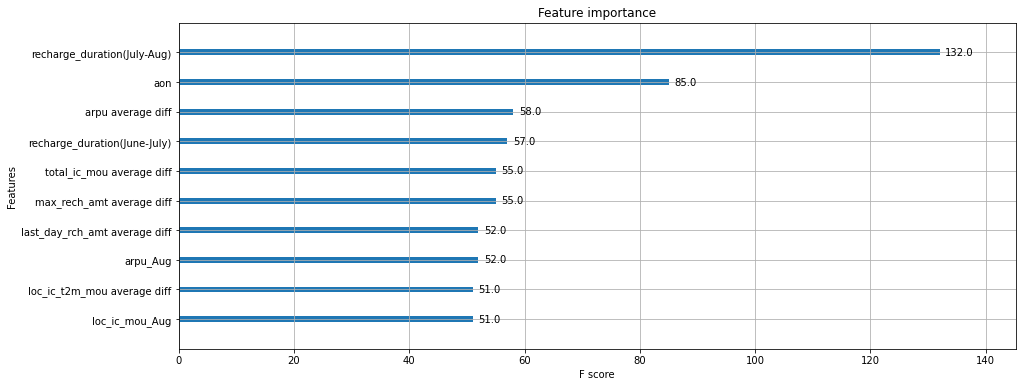

In [227]:

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(111)
plot_importance(model, max_num_features=10,ax = ax,) # top 10 most important features
plt.show()

---
---

## Inference

**XGBoost Returns the Top features considered:**
1. recharge_duration (July-August): [Engineered Feature] The duration between last recharge on July vs last recharge on August
2. aon : Age on Network
3. arpu_average_diff : [Engineered Feature] The average difference in arpu. The arpu on August minus average value of arpu on June and July
4. recharge_duration (June July): [Engineered Feature] The duration between last recharge on June vs last recharge on July\\
5. total_ic_mou average diff : [Engineered Feature] Average difference in total_ic_mou {total incoming minutes of usage}. Value in total_ic_mou for August minus average difference in the value for June and July


---

- The plot does not give us the direction of the feature importance, i.e, if the feature negatively impacts or positively impacts the predictions.
- We will also use SHAP feature importances to get a better understanding of the feature interractions
- [NOTE] SHAP uses a different strategy to get top contributing features, so the features may not exactly match

---
---

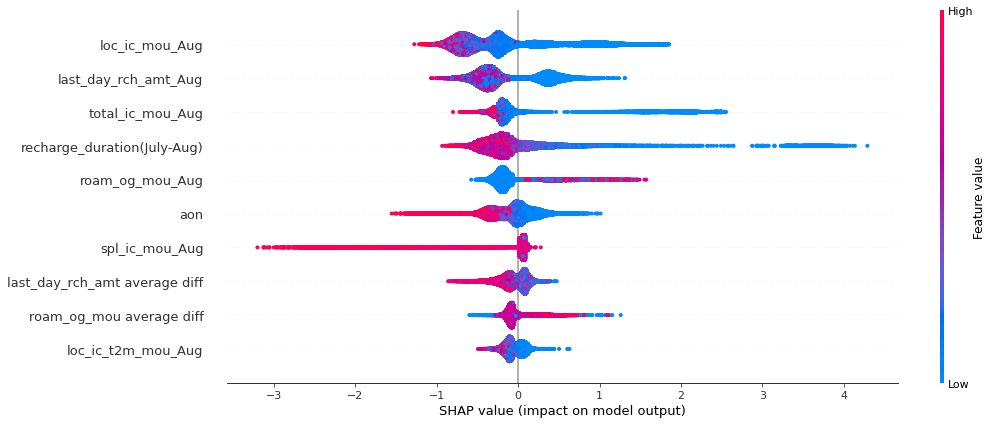

In [160]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train, y_train)
shap.summary_plot(shap_values, X_train, plot_type='dot', max_display = 10, plot_size = (15, 6))

---

## Inference

**Interpreting SHAP variable importance**
- Blue refers to low values of the feature
- Red refers to high values of the feature
- If the plot is stretched towards left, it means a negative impact on the model output
- If the plot is stretched towards right, it means a positive impact on the model output

</br>

**Top Features**

- recharge_duration (July-Aug): Since the blue portion is stretched towards right, it means low values of the feature have a high positive impact on the output, while higher values have a low negative impact (since the red portion is not stretched out)
- spl_ic_mou_Aug : Higher values of the feature have a high negative impact on the model outputs
- aon (Age on Network) : Higher values have a negative impact on the model while lower values have a positive impact on the model
- total_ic_mou_Aug: Lower values have a positive impact on the model while higher values have a slightly negative impact on the model.

---

### Dependency Plot for Features From XGBoost Plot

- We use the dependency plot of SHAP to understand the positive/negative impact of certain features for making the final recommendations.
- We draw the dependency plot for the following features:
    - total_ic_mou average diff
    - loc_ic_mou_Aug

---

#### 1. total_ic_mou average diff

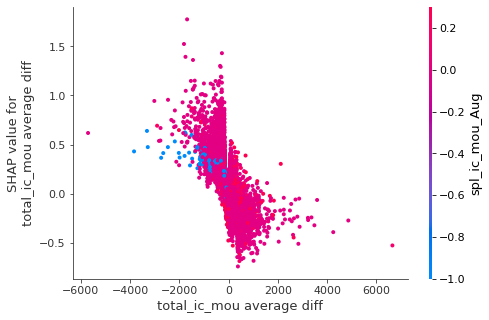

In [224]:
shap.dependence_plot("total_ic_mou average diff",shap_values, X_train)

The above plot suggests that positive values of "total_ic_mou average diff" negatively impacts the outcome, while negative values positively impact the outcome

**Explanation**

total_ic_mou average diff = (total_ic_mou in August) - (Average of total_ic_mou in June and July)

</br>

- total_ic_mou average diff > 0 : usage in August is more compared to June and July ---> Customer has lesser chance to churn (SHAP value < 0, negatively impacts)
- total_ic_mou average diff < 0 : usage in August is less compared to June and July ---> Customer has higher chance to churn (SHAP value > 0, positively impacts)

---

#### loc_ic_mou_Aug

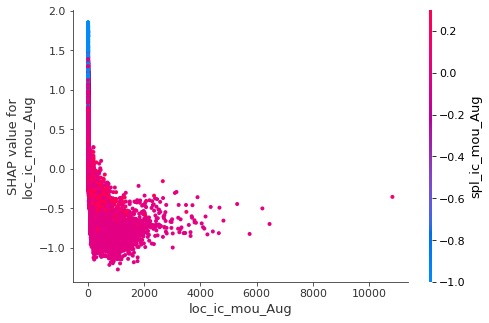

In [228]:
shap.dependence_plot("loc_ic_mou_Aug",shap_values, X_train)

The above plot suggests that if values of "loc_ic_mou_Aug" is close to zero, it positively impacts the outcome, while if it increases, the impact is negative

**Explanation**

</br>

- loc_ic_mou_Aug is the average minutes of usage on local calls in the month of August
- If loc_ic_mou_Aug is close to zero, it means the user has not used the operator in the month of August and is at a higher risk of churning
- If loc_ic_mou_Aug is more than zero, it means the user has been using the operator network and is comparatively at a lower risk of churning

---
---

# FINAL RECOMMENDATIONS

- Users with a lower recharge duration (July-Aug) maybe at a higher chances of churning. This is counter-intuitive, but it may also mean that the user deliberately recharges in the first week of August so that he/she may spend the entire month on the existing pack and switch to a new network provider from the starting of the next month.
- Users with high AON have low chances of churning compared to users with low AON, indicating that old users are more reliable and newer users with less Age on Network are more prone to shifting.4
- total_ic_mou average diff if negative, i.e, average minutes of usage on local incoming calls in August is lesser compared to June and July, the customer is at higher risk of churning
- loc_ic_mou_Aug : Specifically, if the local calls made in August is lesser, the customer is at higher risk of churning